**Project Title: Unmanned Aerial Vehicle(UAV) for Intrusion Detection dataset**

**APPROACH 2**

In this appraoch, we are using Lasso regression for feature selection process and then developing the following models 

Classification using:-
1. Logistic Regression
2. KNN
3. LDA
4. Decision Tree
5. Bagging
6. Random Forest
7. Boosting
8. SVM
9.QDA

In [1]:
#importing libraries
import pickle
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

import pandas as pd
import numpy as np
import h5py
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
pickle_in = open("X_train_App2.pickle","rb")
X_training = pickle.load(pickle_in)

pickle_in = open("y_train_App2.pickle","rb")
y_training = pickle.load(pickle_in)

pickle_in = open("X_test_App2.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test_App2.pickle","rb")
y_test = pickle.load(pickle_in)

In [3]:
print('X_training :', X_training.shape)
print('y_training :', y_training.shape)
print('X_test :', X_test.shape)
print('y_test :', y_test.shape)

X_training : (6241, 18)
y_training : (6241,)
X_test : (62495, 18)
y_test : (62495,)


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.2, random_state=1)

In [5]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (4992, 18)
y_train : (4992,)
X_val : (1249, 18)
y_val : (1249,)


In [6]:
#Choosing the best lamda for lasso regression using cross validation
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.ravel())

LassoCV(cv=10, max_iter=10000)

In [7]:
print(lassocv.alpha_)

0.000341014117307613


In [8]:
clf_lasso = linear_model.Lasso(alpha=0.1)
clf_lasso.set_params(alpha=lassocv.alpha_)
clf_lasso.fit(scale(X_train), y_train)
mean_squared_error(y_val, clf_lasso.predict(scale(X_val)))

0.07099649884005829

In [9]:
pd.Series(clf_lasso.coef_, index=X_train.columns)

0    -0.032206
1     0.020295
2    -0.012034
3    -0.030424
4    -0.168102
5     0.139881
6    -0.015209
7     0.002367
8     0.000000
9    -1.082328
10    0.029648
11    0.370042
12    0.042241
13   -0.119453
14    0.005879
15   -0.296076
16   -0.157348
17    0.746087
dtype: float64

In [10]:
pd.Series(lassocv.coef_, index=X_train.columns)

0    -0.032470
1     0.020508
2    -0.012120
3    -0.029682
4    -0.165168
5     0.140208
6    -0.014696
7     0.004498
8     0.000000
9    -1.998757
10   -0.185202
11    0.391551
12    0.040990
13   -0.104125
14   -0.004029
15   -0.318585
16   -0.167375
17    1.839891
dtype: float64

Here we have performed Lasso regression as feature selection process to eliminate insignificant features as we know that lasso regression will make the feature coefficients to zero.

As seen above, the coefficient of feature no 8 is zero and 7, 14 are also having a value close to zero.


In [11]:
#Dropping column 8 from training and test data
X_train = X_train.drop([8], axis = 1)
X_val = X_val.drop([8],axis = 1)
X_test = X_test.drop([8], axis = 1)

In [12]:
print('X_train : ',X_train.shape)
print('X_val   : ',X_val.shape)
print('X_test  : ',X_test.shape)

X_train :  (4992, 17)
X_val   :  (1249, 17)
X_test  :  (62495, 17)


***1. Logistic Regression***

In [13]:
#Training using logistic regression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

Validation Performance:
Accuracy: 0.9303442754203363 , Misclassification error: 0.06965572457966374
Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       617
         1.0       0.95      0.91      0.93       632

    accuracy                           0.93      1249
   macro avg       0.93      0.93      0.93      1249
weighted avg       0.93      0.93      0.93      1249


Confusion matrix:
[[585  32]
 [ 55 577]]


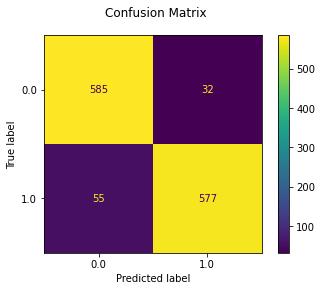

In [14]:
print('Validation Performance:')
y_pred = clf.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(clf, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 0.9330929487179487 , Misclassification error: 0.06690705128205132
Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      2366
         1.0       0.96      0.91      0.93      2626

    accuracy                           0.93      4992
   macro avg       0.93      0.93      0.93      4992
weighted avg       0.93      0.93      0.93      4992


Confusion matrix:
[[2266  100]
 [ 234 2392]]


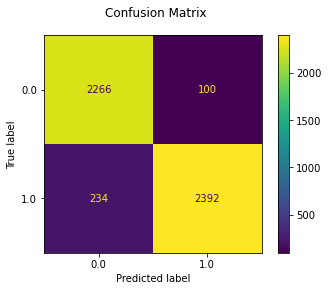

In [15]:
print('Training Performance:')
y_train_pred = clf.predict(X_train) #prediction for validation dataset 
acc = accuracy_score(y_train, y_train_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_train, y_train_pred)}\n")

disp = metrics.plot_confusion_matrix(clf, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9326986158892712 , Test Misclassification error: 0.06690705128205132
Testdata Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93     29466
         1.0       0.96      0.91      0.93     33029

    accuracy                           0.93     62495
   macro avg       0.93      0.93      0.93     62495
weighted avg       0.93      0.93      0.93     62495


Testdata Confusion matrix:
[[28107  1359]
 [ 2847 30182]]


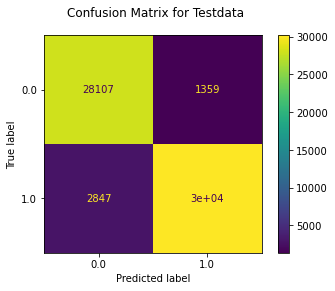

In [16]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()


***2. K-Nearest Neighbors (KNN)***

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)#Initializing KNN with K = 3
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


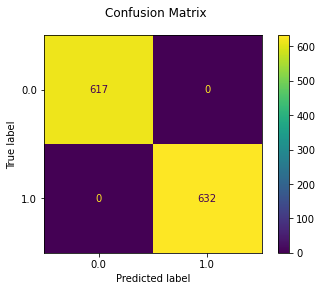

In [18]:
print('Validation Performance:')
y_pred = neigh.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(neigh, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 0.9997996794871795 , Misclassification error: 0.00020032051282048435
Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   1 2625]]


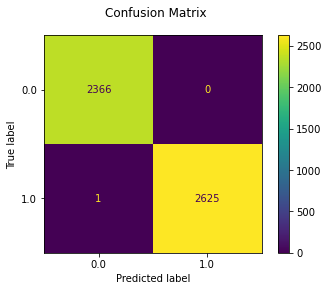

In [19]:
print('Training Performance:')
y_train_pred = neigh.predict(X_train) #prediction for Training dataset 
acc = accuracy_score(y_train, y_train_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_train, y_train_pred)}\n")

disp = metrics.plot_confusion_matrix(neigh, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9988159052724218 , Test Misclassification error: 0.00020032051282048435
Testdata Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29399    67]
 [    7 33022]]


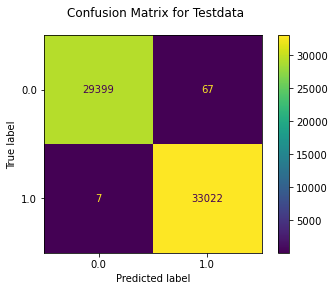

In [20]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = neigh.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()


***3. Linear Discriminant Analysis (LDA)***

In [21]:
lda = LinearDiscriminantAnalysis(solver='svd')

Validation Performance:
Accuracy: 0.9383506805444356 , Misclassification error: 0.0616493194555644
Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93       617
         1.0       0.89      1.00      0.94       632

    accuracy                           0.94      1249
   macro avg       0.95      0.94      0.94      1249
weighted avg       0.94      0.94      0.94      1249


Confusion matrix:
[[541  76]
 [  1 631]]


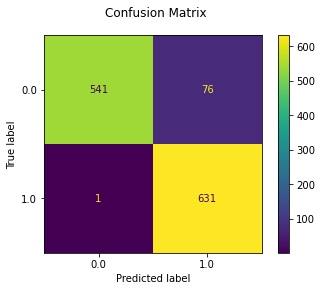

In [22]:
print('Validation Performance:')
y_pred = lda.fit(X_train, y_train).predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(lda, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 0.9360977564102564 , Misclassification error: 0.06390224358974361
Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      2366
         1.0       0.90      0.99      0.94      2626

    accuracy                           0.94      4992
   macro avg       0.94      0.93      0.94      4992
weighted avg       0.94      0.94      0.94      4992


Confusion matrix:
[[2062  304]
 [  15 2611]]


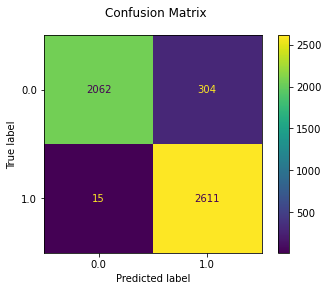

In [23]:
print('Training Performance:')
ytrain_pred = lda.fit(X_train, y_train).predict(X_train) #prediction for Training dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(lda, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9380590447235779 , Test Misclassification error: 0.06390224358974361
Testdata Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     29466
         1.0       0.90      0.99      0.94     33029

    accuracy                           0.94     62495
   macro avg       0.95      0.93      0.94     62495
weighted avg       0.94      0.94      0.94     62495


Testdata Confusion matrix:
[[25801  3665]
 [  206 32823]]


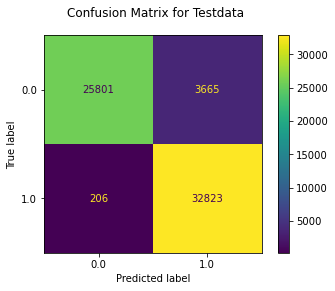

In [24]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = lda.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(lda, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

***4. Decision Tree***

In [25]:
DTclf = DecisionTreeClassifier(random_state=0)
DTclf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

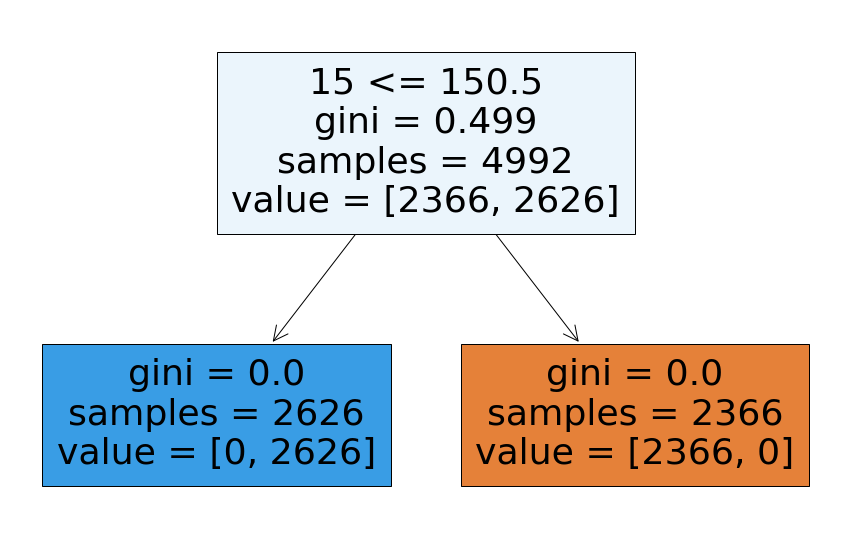

In [26]:
#Visualizing decision tree 
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(DTclf, feature_names=X_training.columns, filled=True)

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


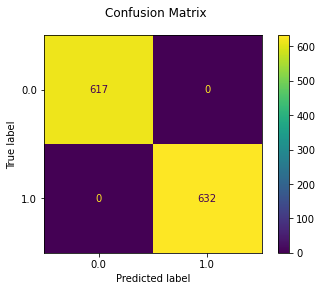

In [27]:
print('Validation Performance:')
y_pred = DTclf.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(DTclf, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   0 2626]]


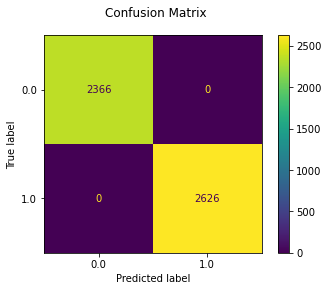

In [28]:
print('Training Performance:')
ytrain_pred = DTclf.predict(X_train) #prediction for train dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(DTclf, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 1.0 , Test Misclassification error: 0.0
Testdata Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29466     0]
 [    0 33029]]


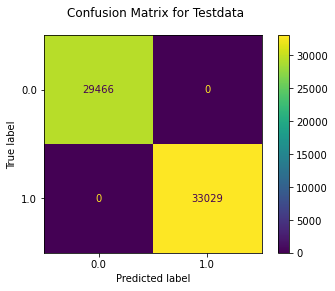

In [29]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = DTclf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(DTclf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

***5. Bagging***

In [30]:
#Bagging = Random forest with complete features 
bgclf = RandomForestClassifier(max_features=11, random_state=1)   #m = sqrt(p); m = sqrt(11) = 4
bgclf.fit(X_train, y_train)

RandomForestClassifier(max_features=11, random_state=1)

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for Bagging classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


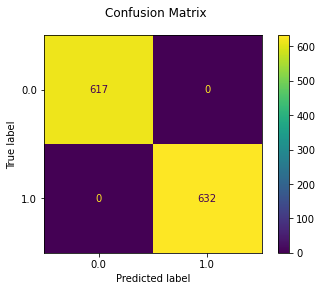

In [31]:
print('Validation Performance:')
y_pred = bgclf.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for Bagging classifier:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(bgclf, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for Bagging classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   0 2626]]


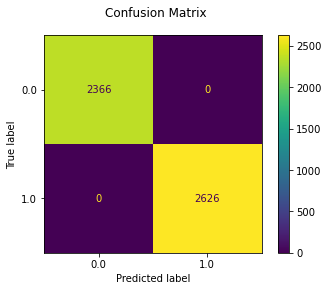

In [32]:
print('Training Performance:')
ytrain_pred = bgclf.predict(X_train) #prediction for train dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for Bagging classifier:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(bgclf, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 1.0 , Test Misclassification error: 0.0
Testdata Classification report for bagging classifier :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29466     0]
 [    0 33029]]


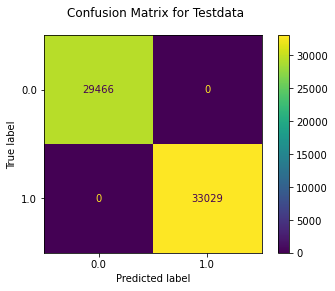

In [33]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = bgclf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for bagging classifier :\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(bgclf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

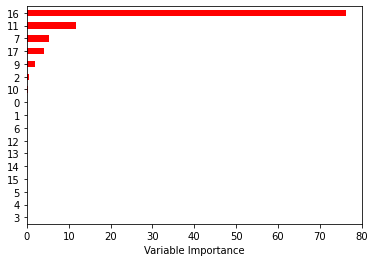

In [34]:
Importance = pd.DataFrame({'Importance':bgclf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

***6. Random Forest***

In [35]:
RFclf = RandomForestClassifier(max_features=4, random_state=1)   #m = sqrt(p); m = sqrt(11) = 4
RFclf.fit(X_train, y_train)

RandomForestClassifier(max_features=4, random_state=1)

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier RandomForestClassifier(max_features=4, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


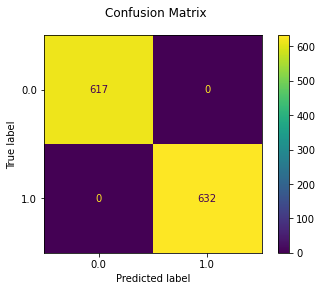

In [36]:
print('Validation Performance:')
y_pred = RFclf.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {RFclf}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(RFclf, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier RandomForestClassifier(max_features=4, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   0 2626]]


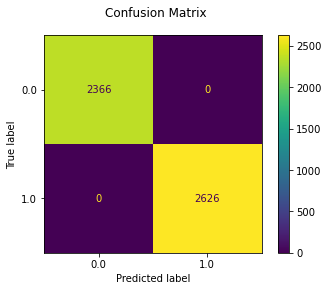

In [37]:
print('Training Performance:')
ytrain_pred = RFclf.predict(X_train) #prediction for train dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {RFclf}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(RFclf, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 1.0 , Test Misclassification error: 0.0
Testdata Classification report for classifier RandomForestClassifier(max_features=4, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29466     0]
 [    0 33029]]


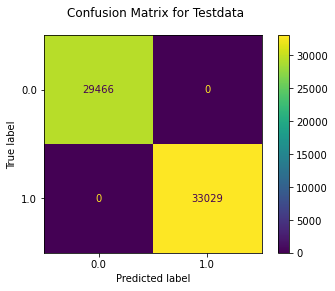

In [38]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = RFclf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {RFclf}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(RFclf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

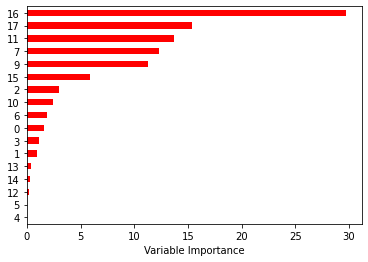

In [39]:
Importance = pd.DataFrame({'Importance':RFclf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

***6. Boosting***

In [40]:
boostclass = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, random_state=1)
boostclass.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1)

12    3.112576e-14
11    3.675683e-14
15    7.453325e-14
7     7.784559e-14
2     2.986019e-13
17    3.131025e-13
14    3.174535e-13
3     3.352493e-13
0     3.384268e-13
13    3.389256e-13
9     3.473274e-13
10    4.106721e-13
5     4.215436e-13
6     4.218680e-13
1     4.257532e-13
4     4.418427e-13
16    1.000000e+02
dtype: float64


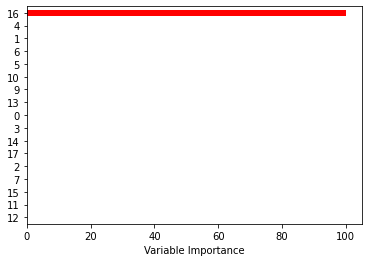

In [41]:
#Visualising the important features
feature_importance = boostclass.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X_train.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


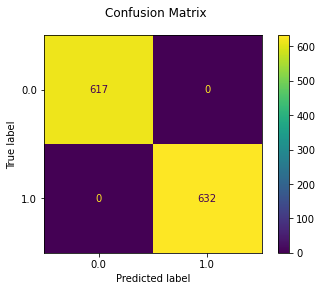

In [42]:
print('Validation Performance:')
y_pred = boostclass.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   0 2626]]


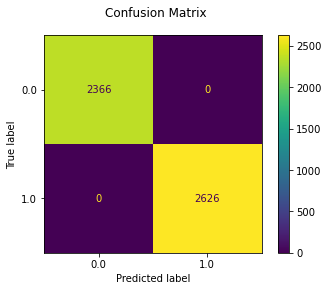

In [43]:
print('Training Performance:')
ytrain_pred = boostclass.predict(X_train) #prediction for train dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 1.0 , Test Misclassification error: 0.0
Testdata Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29466     0]
 [    0 33029]]


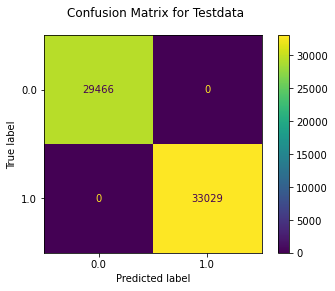

In [44]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = boostclass.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

***8. Support Vector Machine (SVM)***

In [ ]:
# https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
svc = svm.SVC(kernel='linear', C=1, gamma='auto').fit(X_train, y_train)

In [ ]:
print('Validation Performance:')
y_pred = svc.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(svc, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [ ]:
print('Training Performance:')
ytrain_pred = svc.predict(X_train) #prediction for train dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(svc, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [ ]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(svc, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

#### QDA

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

Validation Performance:
Accuracy: 0.9967974379503602 , Misclassification error: 0.0032025620496397567
Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[616   1]
 [  3 629]]


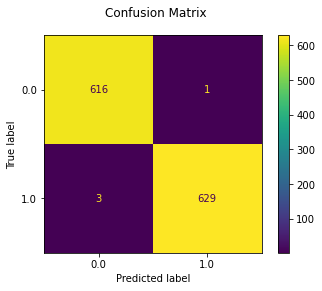

In [15]:
print('Validation Performance:')
y_pred = qda.fit(X_train, y_train).predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(qda, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 0.9957932692307693 , Misclassification error: 0.0042067307692307265
Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2366
         1.0       1.00      0.99      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2365    1]
 [  20 2606]]


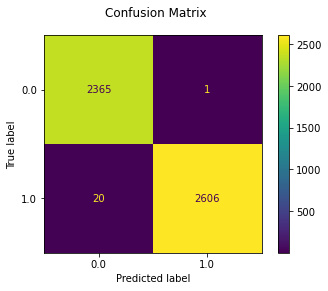

In [16]:
print('Training Performance:')
ytrain_pred = qda.fit(X_train, y_train).predict(X_train) #prediction for validation dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(qda, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.996159692775422 , Test Misclassification error: 0.0042067307692307265
Testdata Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     29466
         1.0       1.00      0.99      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29457     9]
 [  231 32798]]


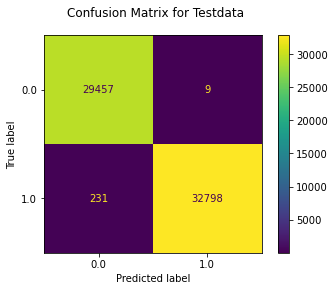

In [17]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = qda.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(qda, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()